In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
'''
1. 
https://www.kaggle.com/c/digit-recognizer/data

For this problem most of the datasets I have seen being used in order to train neural networks has been drawn digits 
with rows and columns of datasets containing the value of darkness to represent whether the pixel location is basically 
a white space or part of the digit creation. If figured that this seemed like a simple enough dataset to use and because 
of all the different examples I saw that means I will also have resources to use if I ever become stuck on a concept.


Every list that seems to talk about what are the best options for frameworks to create a deep learning model all include 
TensorFlow. Not to mention TensorFlow also has its own implementation for keras, another popular framework for deep 
learning potentially giving me two for the price of one in frameworks (https://www.tensorflow.org/api_docs/python/tf/keras).
Thanks to TensorFlow’s use in research and production purposes, it also has its own form of optimization techniques 
allowing for it to perform complicated mathematical operations like the ones that will be used in the neural net which 
can then be used to run the model on even simple devices like my phone. 
(https://www.tutorialspoint.com/what-is-tensorflow-and-how-keras-work-with-tensorflow-to-create-neural-networks) 
(https://www.analyticsvidhya.com/blog/2016/10/an-introduction-to-implementing-neural-networks-using-tensorflow/). 
Adding on to this, TensorFlow also appears to have a dedicated set of functions used in order to work with neural 
networks. Including a function for every kind of activation function that can be used in the neural network layers which 
will make performing any of the hard math components that much easier to follow 
(https://www.tensorflow.org/api_docs/python/tf/nn). 


https://www.askpython.com/python/python-frameworks-for-deep-learning
https://thecleverprogrammer.com/2021/05/16/deep-learning-frameworks-in-python/
https://techvidvan.com/tutorials/python-deep-learning-libraries/
https://data-flair.training/blogs/deep-learning-with-python-libraries/
https://www.kdnuggets.com/2017/02/python-deep-learning-frameworks-overview.html
https://hprc.tamu.edu/files/training/2021/Spring/Introduction_to_DL_with_TensorFlow.pdf
https://towardsdatascience.com/building-your-first-neural-network-in-tensorflow-2-tensorflow-for-hackers-part-i-e1e2f1dfe7a0
https://www.bmc.com/blogs/create-neural-network-with-tensorflow/
https://adventuresinmachinelearning.com/python-tensorflow-tutorial/
https://www.analyticsvidhya.com/blog/2016/10/an-introduction-to-implementing-neural-networks-using-tensorflow/


'''

In [ ]:
# 2.

In [2]:
data = pd.read_csv('digit_train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
pd.options.mode.use_inf_as_na = True
data.fillna(0)
data.columns[data.isnull().any()]
data = data.astype("float")

In [4]:
# now declare the weights connecting the input to the hidden layer 
W1 = tf.Variable(tf.random.normal([784, 100], stddev=0.01), name='W1')
b1 = tf.Variable(tf.random.normal([100]), name='b1')
# and the weights connecting the hidden layer to the output layer
W2 = tf.Variable(tf.random.normal([100, 10], stddev=0.01), name='W2')
b2 = tf.Variable(tf.random.normal([10]), name='b2')


In [5]:
# (Z = Wx + b)
### https://adventuresinmachinelearning.com/vanishing-gradient-problem-tensorflow/
'''
Here is were the feed forward algorithm is implemented. For the activation function I went with Leaky Relu because
the Relu function is believed to be the best function to use in deep learning, and the leaky relu is basically the same
as Relu only it fixes any of the inconveniences that can happen if x < 0. 
'''
def feed_forward(x_input, W1, b1, W2, b2):
    W = tf.reshape(x_input, (x_input.shape[0], -1))
    W = tf.cast(W, tf.float32)
    
    W = tf.reshape(W,[-1,784])
    
    x = tf.add(tf.matmul(W, W1), b1)
    x = tf.nn.leaky_relu(x)
    output = tf.add(tf.matmul(x, W2), b2)
    return output

Epoch: 1, loss=0.75415, test set      accuracy=87.89809%
Epoch: 2, loss=0.12285, test set      accuracy=87.89809%
Epoch: 3, loss=0.10657, test set      accuracy=87.89809%
Epoch: 4, loss=0.07347, test set      accuracy=87.89809%
Epoch: 5, loss=0.09412, test set      accuracy=87.89809%
Epoch: 6, loss=0.08885, test set      accuracy=87.89809%
Epoch: 7, loss=0.07805, test set      accuracy=87.89809%
Epoch: 8, loss=0.07169, test set      accuracy=87.89809%
Epoch: 9, loss=0.07252, test set      accuracy=87.89809%
Epoch: 10, loss=0.05899, test set      accuracy=87.89809%

Training complete!


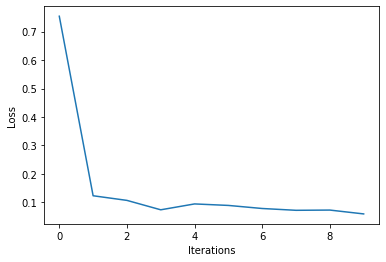

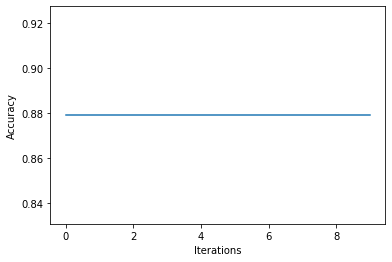

In [6]:
# https://www.youtube.com/watch?v=w8yWXqWQYmU
# https://towardsdatascience.com/building-your-first-neural-network-in-tensorflow-2-tensorflow-for-hackers-part-i-e1e2f1dfe7a0
# https://adventuresinmachinelearning.com/python-tensorflow-tutorial/
# https://www.analyticsvidhya.com/blog/2016/10/an-introduction-to-implementing-neural-networks-using-tensorflow/

data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000]
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = np.reshape(X_dev,(n,28,28))

data_train = data[1000:m]
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = np.reshape(X_train,(n,28,28))


data_test = pd.read_csv('digit_test.csv')
data_test.fillna(0)
data_test.columns[data_test.isnull().any()]
data_test = data.astype("float")
data_test = np.array(data_test)
m,n = data_test.shape

#data_test = data_test.T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = np.reshape(X_test,(n,28,28))



'''
Once I have separated the data into dev, train, and test sets I then take the X values of all these datasets and divide
them by 255 which is the maximum number we can get from these datasets. This is to transform the data into sets that 
will be scaled between 0 and 1 which a lot of examples I saw do in order to make better models.
'''

X_dev = X_dev / 255.
X_train = X_train / 255.
X_test = X_test / 255.





# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
'''
Thanks to the packages offered in tensorflow there were even functions that can be used to make the optimization
algorithms, including arguments that can be filled with any added information like the learning rate. Out of the ones
from this page the RMSprop algorithm with the hyperparameter momentum at 0.2 seems to perform the best in terms of accuracy
score, but the Adam and Adamax algortihms were also pretty successful and with both of them having a somewhat easier time
with having consistently decreasing loss values and mostly consistently increasing accuracy scores.
'''
# optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001)
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001, momentum=0.2)

loss_list = []
accuracy_list = []
iterations = 10
total_batch = int((len(Y_train)) / 100)
for epoch in range(iterations):
    avg_loss = 0
    for i in range(total_batch):
        '''
        I originally tried to get the batch data from a 2D array but that made the accuracy of the model be too low
        while also taking a longer time to compute. So instead I tried converting the data into a 3D array like
        how I saw in most tutorials done for neural nets and that made the data easier to parse for the run time 
        while also increasing the accuracy drastically.
        
        One of the hyperparameters I was testing out is the mini-batch size that is taken from the training data 
        during each batch iteration. From small to large sizes each had their own various results. After
        some comparisons using a mini-batch size of 200 seems to yield the best results so far.
        '''
        index = np.random.randint(0, len(Y_train), 200)
        batch_x = X_train[index,:,:]
        batch_y = Y_train[index]
        
        '''
        I now convert all of the batch X and Y sets into tensor variables so that I may be able to use the associated 
        functions for them, such as the next one I will be using on the batch Y data with tf.one_hot. This will convert all of 
        the values in the batch Y matrix into an array of zeros with only one non-zero value in the array being the value 
        '1' which will be located in the index of the array that the current Y value is representing. To calrify, say that 
        in the array there is a value of 3, with one-hot encoding that value now becomes the array [0,0,0,1,0,0,0,0,0,0]. 
        This is mainly because all of the digits trying to be recognized are values 0-9 and the encoding array will be 
        used with the output layer as a way of classifying the answer
        '''
        # create tensors
        batch_x = tf.Variable(batch_x)
        batch_y = tf.Variable(batch_y)
        # create a one hot vector
        batch_y = tf.cast(batch_y,tf.int32)
        batch_y = tf.one_hot(batch_y, depth = 10)
        
        
        '''
        This tf.GradientTape() function was a big help as it's able to calculate the derivative without having to write 
        the formulas and from it aquire the gradients in order to then update the weights and biases.
        I also use this tensorflow function to compute the loss value called softmax_cross_entropy_with_logits. It
        takes in the labels (in this case the one_hot encoded y values) and the output values from the feed forward 
        layer and performs the softmax activation function and the cross-entropy loss function all in one function.
        There are also other tensorflow functions that can do the same thing but after testing them the softmax with
        cross-entropy performs the best with no errors. And the reduce_mean function is used in order to get the
        mean values from all the tensor values that comes from the softmax cross-entropy function
        
        '''
        # https://www.geeksforgeeks.org/python-tensorflow-gradienttape/
        with tf.GradientTape() as tape:
            logits = feed_forward(batch_x, W1, b1, W2, b2)
            activation_loss = tf.nn.softmax_cross_entropy_with_logits(labels=batch_y,logits=logits)
            #print(activation_loss)
            loss = tf.reduce_mean(activation_loss)
            #loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=batch_y,logits=logits))
            
            
            # https://www.geeksforgeeks.org/python-tensorflow-gradienttape-gradient/
            gradients = tape.gradient(loss, [W1, b1, W2, b2])
            optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
            avg_loss += loss / total_batch
        
    test_logits = feed_forward(X_dev, W1, b1, W2, b2)
    # print(test_logits)
    max_idxs = tf.argmax(test_logits, axis=1)
    test_acc = np.sum(max_idxs.numpy() == Y_dev) / len(Y_dev)
    loss_list.append(avg_loss)
    accuracy_list.append(test_acc)
    print(f"Epoch: {epoch+1}, loss={avg_loss:.5f}, test set      accuracy={test_acc*100:.5f}%")
print("\nTraining complete!")

it = [i for i in range(iterations)]
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(it,loss_list)
plt.show()

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.plot(it,accuracy_list)
plt.show()

In [7]:
# https://stackoverflow.com/questions/40879504/how-to-apply-drop-out-in-tensorflow-to-improve-the-accuracy-of-neural-network
# https://datascience.stackexchange.com/questions/31248/how-to-improve-accuracy-of-deep-neural-networks
# https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/
# https://deeplizard.com/learn/video/0h8lAm5Ki5g

In [8]:
test_logits = feed_forward(X_test, W1, b1, W2, b2)
max_idxs = tf.argmax(test_logits, axis=1)
test_acc = np.sum(max_idxs.numpy() == Y_test) / len(Y_test)
print(f"accuracy={test_acc*100:.5f}%")

accuracy=87.89809%


In [ ]:
'''
3. 
When it came to choosing the hyperparameters for this HW I mostly did a lot of trial and error testing and
compared results to get what I have now. I at first just started with the blank tensorflow functions that I have now
using just their default argument values to see how they would work at first. Once I felt the process was complete I then 
started playing around with the argument values of the functions to see if I could get better results. My version of 
getting better results usually just consisted of having a continually decreasing cost value as well as a good accuracy 
score. I figured this was the best way of measuring the competency of the methods. Based on what each of the functions
I have used do in their document explanations, it appears that I did not use regularization and felt no need to use it
during the training. The results I were getting were mostly in the 80-90 accuracy range and some even in the 70-80 range
this meant the my implementation was no longer underfitting like it was before I changed the shape of the data into
3D arrays and it is most likely not overfitting due to it not constantly being in the 90-100 range. Therefore, I felt no
reason to try and use regularization. I did use and test out different optimization algorithms that tensorflow had to offer.
Unlike with regularization, which is mostly used in order to fix overfitting issues, the optimization algorithm is needed
to find the best set of data inputs that can train the model to achieve better results. Making it practically a 
necessity to add to the ML process.

Regardless, the decision of using the tensorflow framework for this was a very big help. In just one line of code
I was able to get results that would have taken me countless trial and error of coding and debugging to try
and make sure that I make a clear and operationable function. 

'''